# Question 1

### Question 1a

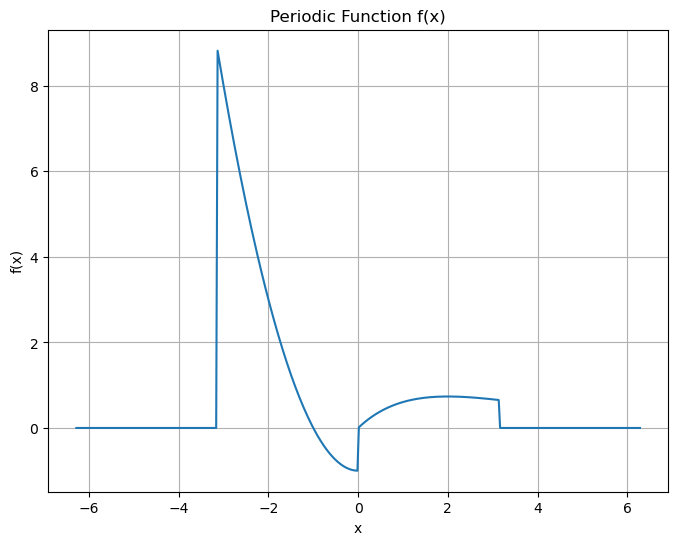

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    if -np.pi <= x<0: #defining the function and the range from -pi to 0
        return x**2 - 1;
    elif 0 <= x <= np.pi: #second function with the range 
        return x * np.exp(-x/2)
    else:
        return 0
    
#Plotting the periodic function f(x) over the domain

x = np.linspace(-2*np.pi, 2*np.pi, 400)#creates 400 evenly spaced values between -2pi to 2pi in an array

#uses a list comprehension where it loops through each xi value in x array and calculates the corresponding y 
#value by calling the function f(xi)
y = [f(xi) for xi in x]

plt.figure(figsize=(8, 6)) #creates a figure plot of 6 x 8 inches
plt.plot(x, y) #creates the plot of the periodic function
plt.title("Periodic Function f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

### Question 1b

In [14]:
# import numpy as np
# from scipy.integrate import quad
# import matplotlib.pyplot as plt

# # Calculate the coefficients

# def fourier_coefficient(n, L):
#     a_n = (1 / L) * quad(lambda x: f(x) * np.cos(n * x), -L, L)[0]
#     b_n = (1 / L) * quad(lambda x: f(x) * np.sin(n * x), -L, L)[0]
#     return a_n, b_n

# # Number of harmonics
# N = 150

# # Period of the function
# L = np.pi

# # Calculate Fourier coefficients up to N harmonics
# a_coeffs = []
# b_coeffs = []
# for n in range(1, N + 1):
#     a_n, b_n = fourier_coefficient(n, L)
#     a_coeffs.append(a_n)
#     b_coeffs.append(b_n)

# # Display the Fourier coefficients (you can print them if needed)
# for n in range(1, N + 1):
#     print(f'a_{n} = {a_coeffs[n-1]}, b_{n} = {b_coeffs[n-1]}')
# # Now, you have the Fourier coefficients for the representation.

In [21]:
# Fourier series coefficients
def a(n, L, accuracy=1000):
    a, b = -L, L
    dx = (b - a) / accuracy
    integration = 0
    for x in np.linspace(a, b, accuracy):
        integration += f(x) * np.cos(n * x / L)
    integration *= dx
    return integration / L

def b(n, L, accuracy=1000):
    a, b = -L, L
    dx = (b - a) / accuracy
    integration = 0
    for x in np.linspace(a, b, accuracy):
        integration += f(x) * np.sin(n * x / L)
    integration *= dx
    return integration / L

# Fourier series
def Sf(x, N, L):
    a0 = a(0, L)
    sum = np.zeros(np.size(x))
    for n in range(1, N+1):
        sum += (a(n, L) * np.cos(n * x / L)) + (b(n, L) * np.sin(n * x / L))
    return (a0 / 2) + sum

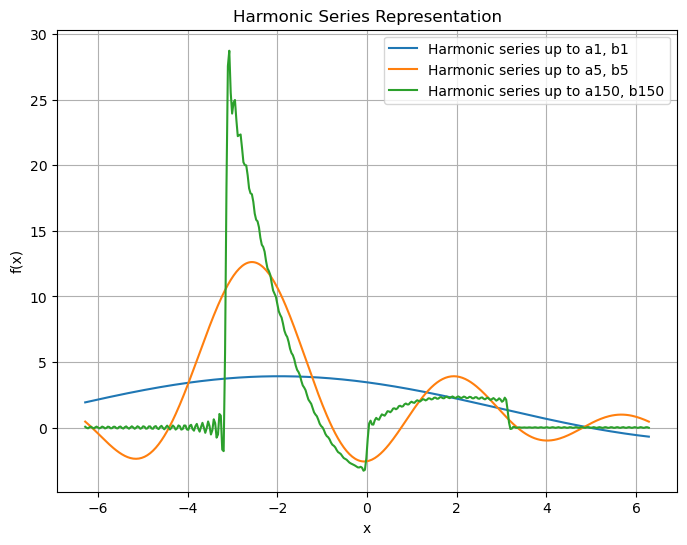

In [22]:
# Plotting the harmonic series
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y1 = Sf(x, 1, np.pi) # for part b
y5 = Sf(x, 5, np.pi) # for part c
y150 = Sf(x, 150, np.pi)

plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='Harmonic series up to a1, b1') # for part b
plt.plot(x, y5, label='Harmonic series up to a5, b5') # for part c
plt.plot(x, y150, label='Harmonic series up to a150, b150')
plt.title("Harmonic Series Representation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Root Mean Square Error (RMSE) for part d
def rmse(y_actual, y_predicted):
    return np.sqrt(np.mean((y_actual-y_predicted)**2))

y_actual = [f(xi) for xi in x]
rmse_b1 = rmse(y_actual, y1)
rmse_b5 = rmse(y_actual, y5)
rmse_b150 = rmse(y_actual, y150) # RMSE calculation

print(f"RMSE for harmonic series up to a150, b150: {rmse_b150}")

print(f"RMSE for harmonic series up to a1, b1: {rmse_b1}")
print(f"RMSE for harmonic series up to a5, b5: {rmse_b5}")

RMSE for harmonic series up to a150, b150: 4.019204448330416
RMSE for harmonic series up to a1, b1: 2.455557135939916
RMSE for harmonic series up to a5, b5: 3.4171016904023257
